<img src="https://www.igp.gob.pe/programas-de-investigacion/images/logo_igp_normal.png" alt= "LOGO CAT" width=350 height=200 align = "right">
<br>
<br>
<br>
<br>
<h1><font color="#7F000E" size=5>Instituto Geofisico del Peru </font></h1>
<h1><font color="#7F000R" size=6> PYSPARK CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4>
 </font></h1>
<br>
<div style="text-align:left">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Pyspark | Análisis de datos con Python | ETL | Workshop | Carga, transformación y filtrado </font><br>
<font color="#7F000e" size=3> 01/08/2024 </font><br>
</div>

---

<font color="blue" size=3> Ing. Alexander Valdez</font><br>
* Link de github:  [GITHUB](https://github.com/sebastianVP)
* Link de Website: [WebSite](https://avpresume-7qretxfih6bnejjtxcvhdr.streamlit.app/)

## Apache Spark 

Apache Spark es un marco de procesamiento de datos distribuidos y de codigo abierto diseñado para proporcionar velocidad y facilidad de uso, fue desarrollado en respuesta a las limitaciones de **mapreduce** , es conocido por su capacidad para procesar grandes conjuntos de datos de manera eficiente en Clusters distribuidos. El modelo de programacion  desarrollado por Apache hadoop iene limitaciones debido al uso de mapreduce y por eso  aparece Apache Spark con el objetivo de mejorar el rendimiento y facilitar el desarrollo de aplicaciones y procesamiento de datos a gran escala.

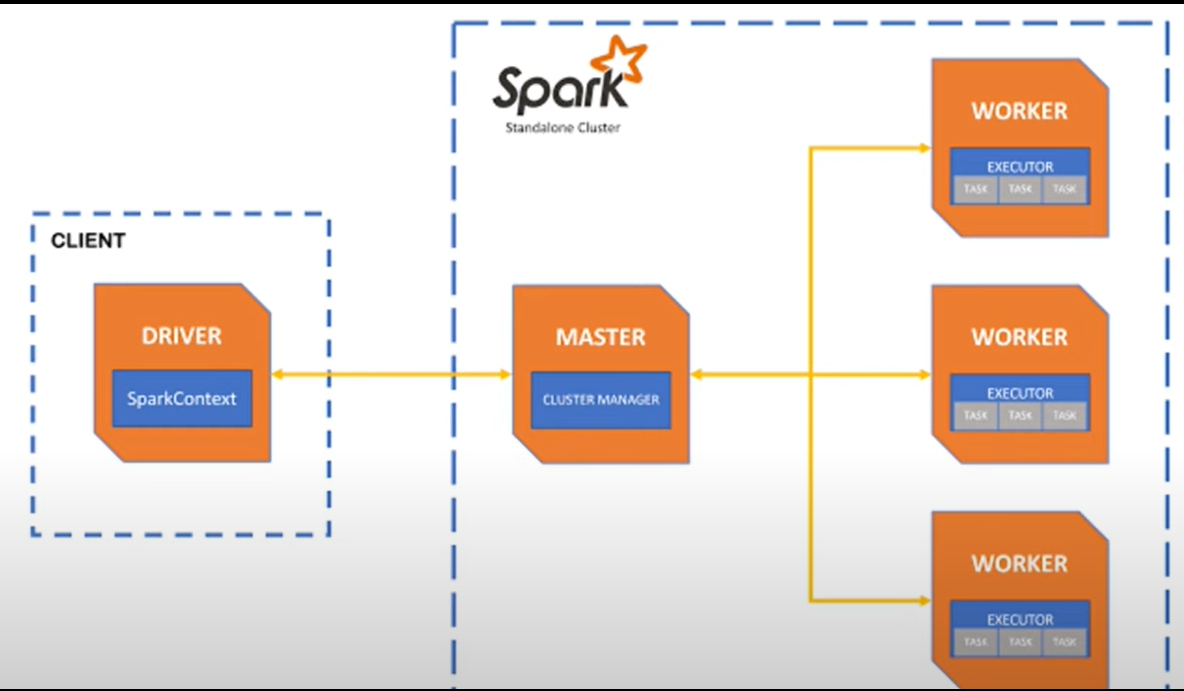

Aunque mapreduce era eficaz para el procesamiento de volumenes altos de datos en Cluster distribuidos tenia algunas limitaciones importantes, especialmente en terminos de rendimiento y facilidad. Spark esta diseñado para ofrecer un procesamiento de datos  rapido mediante el uso de MEMORIA RAM para almacenar datos en lugar de depender del acceso A DISCO que es mas lento

Spak optimiza las operaciones mediante la ejecucion de tareas en memoria siempre que sea posible  lo que reduce significativamente los tiempoes de ejecucion.

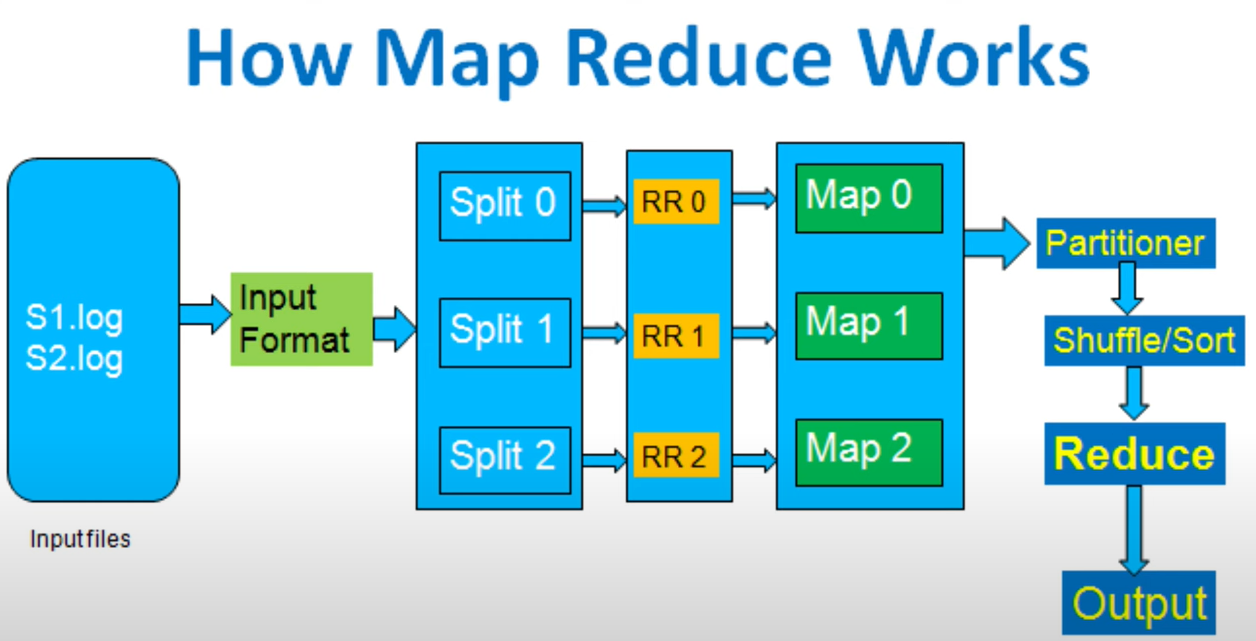

Apache Spark es de codigo abierto y la contribución de la comunidad ha sido fundamental para el éxito y su adolpacion generalizada en el campo del Analisis de Datos.


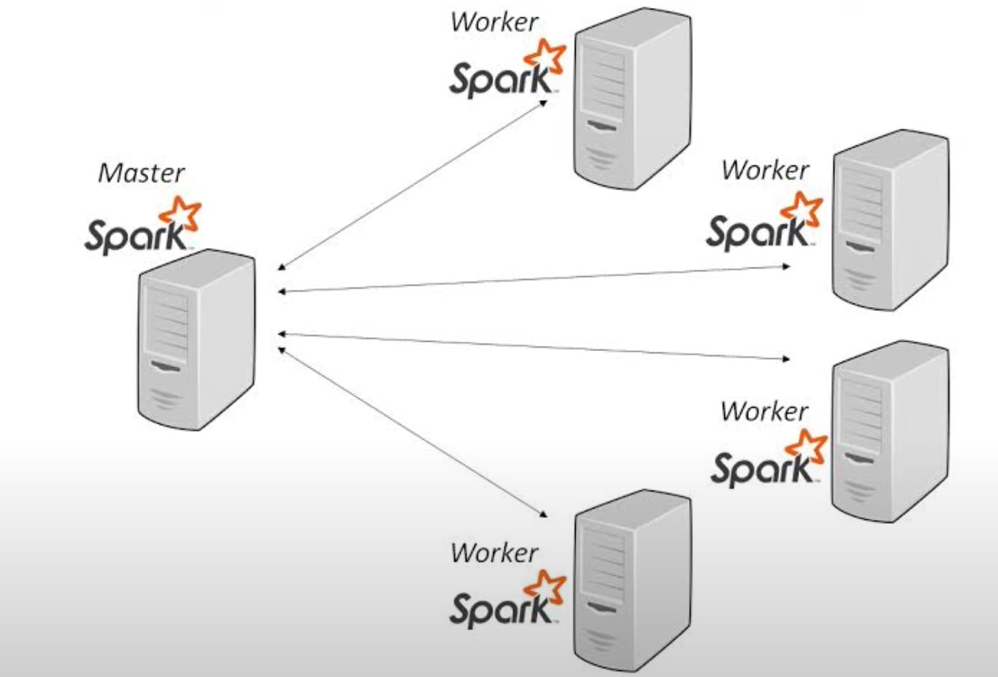

Pyspark 

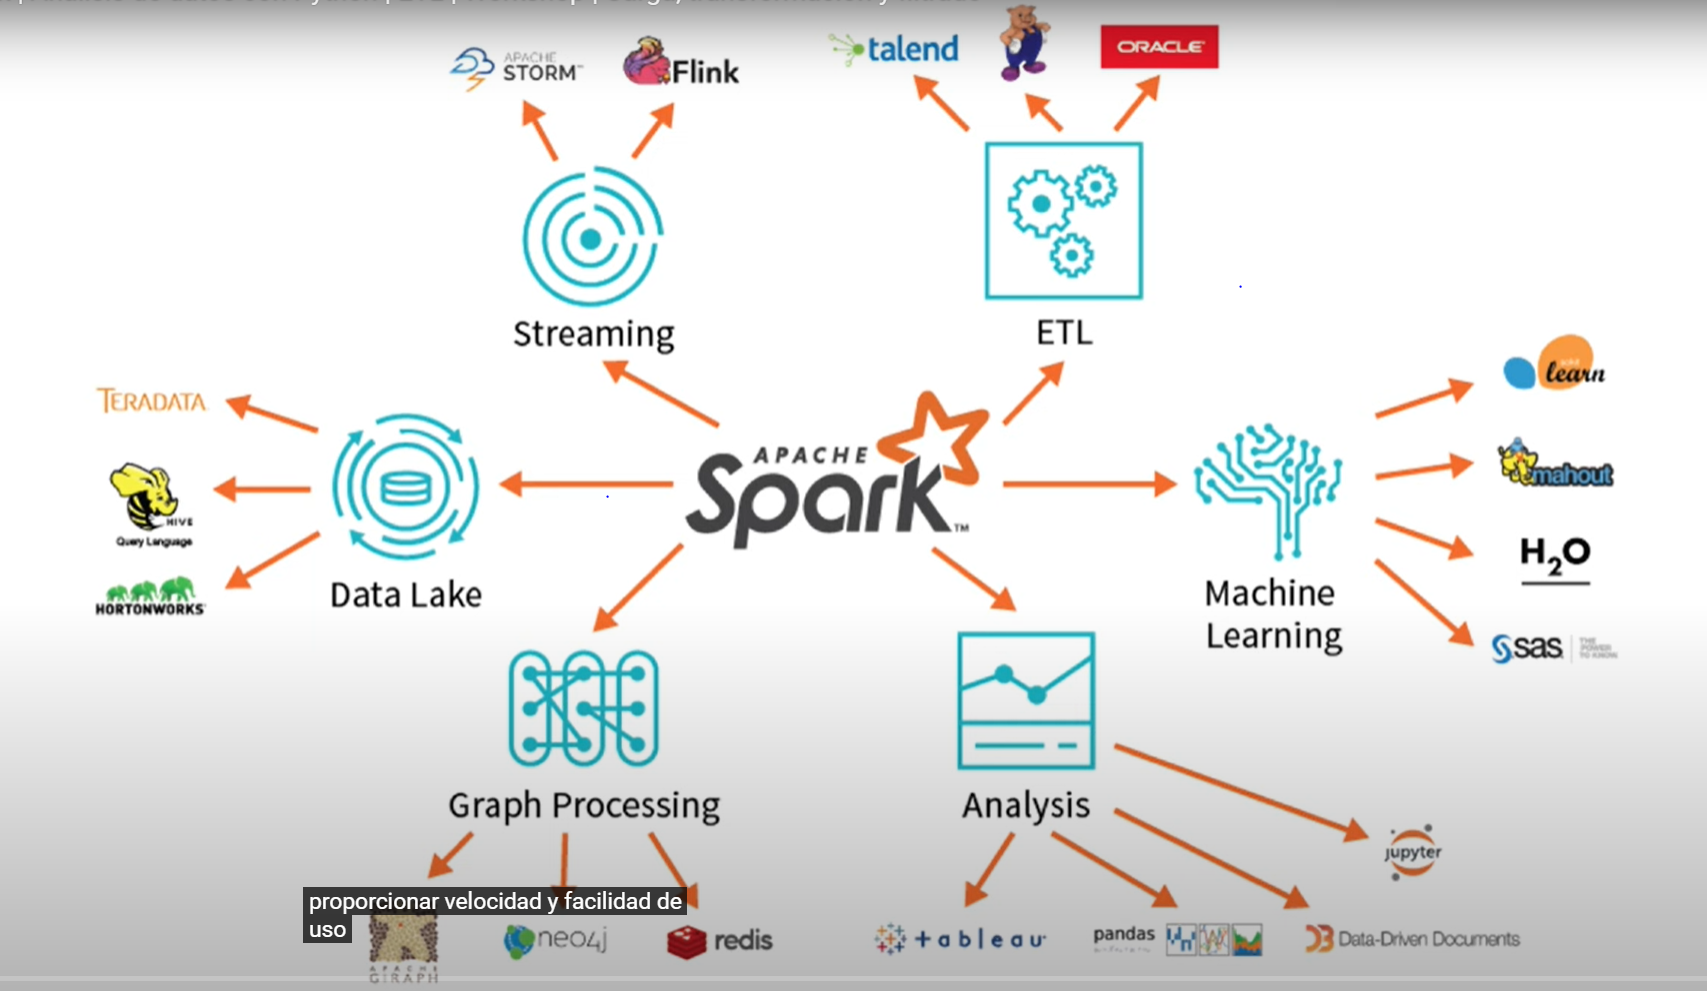

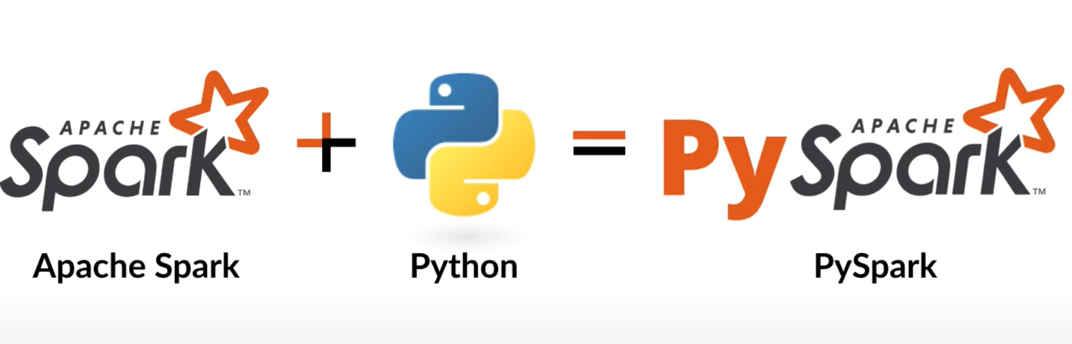

Python proporciona una interfaz amigable para trabajar con Spark es decir PySpark es la interfaz de pytghon para Apache  Spark

# PRACTICA DE PySpark

* Hagamos un proceso de ETL
* La idea de Apache Spark es poder utilizarlo para aprovechar el sistema distribuido a nivel de clúster, nodos y demas.
* Pero si solamente lo vamos a utilizar en el equipo en nuestra PC para cuestiones practicas con colab es suficiente para desarrolar.

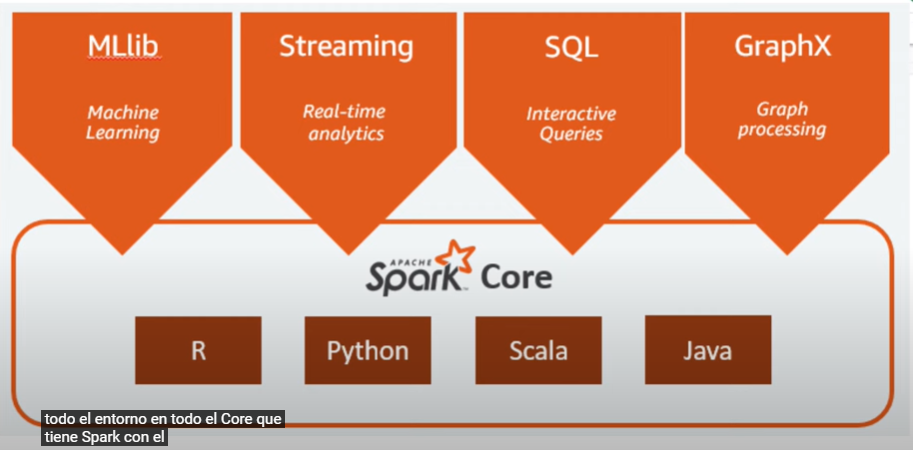

In [4]:
# INSTALACION
!pip install pyspark

## Sesion PySpark

- Spark session
- Spark context

## CREAR SESION DE SPARK

In [9]:
from pyspark.sql import SparkSession
from pyspark  import SparkContext
# crear una sesion con elementos
SpSession =  SparkSession \
            .builder \
            .appName("Demo Spark") \
            .getOrCreate()
# rdd son los tipos de estuctura de datos tipo DataFrame


In [10]:
# hacer ahora el llamado a SparkContext
SpContext = SpSession.sparkContext

##  CARGA DE DATOS

In [15]:
data = SpSession.read.csv('C:/Users/soporte/Documents/ML_NEW_LIFE_DS_AGOSTO_2024/pyspark_EDA_ETL/cars_example.csv',header=True,sep=';')
data.show(5)# MOSTRAR 5 ELEMENTOS UTILIZANDO LA FUNCION SHOW

+--------------------+------+---------+------------+----------+------+------------+-----+------+
|                 Car|   MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+------+---------+------------+----------+------+------------+-----+------+
|              STRING|DOUBLE|      INT|      DOUBLE|    DOUBLE|DOUBLE|      DOUBLE|  INT|   CAT|
|Chevrolet Chevell...|    18|        8|         307|       130|  3504|          12|   70|    US|
|   Buick Skylark 320|    15|        8|         350|       165|  3693|        11.5|   70|    US|
|  Plymouth Satellite|    18|        8|         318|       150|  3436|          11|   70|    US|
|       AMC Rebel SST|    16|        8|         304|       150|  3433|          12|   70|    US|
+--------------------+------+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



## CONOCIENDO LA DATA

In [16]:
data.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



In [17]:
data.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

In [18]:
data.dtypes


[('Car', 'string'),
 ('MPG', 'string'),
 ('Cylinders', 'string'),
 ('Displacement', 'string'),
 ('Horsepower', 'string'),
 ('Weight', 'string'),
 ('Acceleration', 'string'),
 ('Model', 'string'),
 ('Origin', 'string')]

##  SELECCION DE COLUMNAS


In [19]:
# Varios metodos
# METODO 1
data.select(data.Car).show()

+--------------------+
|                 Car|
+--------------------+
|              STRING|
|Chevrolet Chevell...|
|   Buick Skylark 320|
|  Plymouth Satellite|
|       AMC Rebel SST|
|         Ford Torino|
|    Ford Galaxie 500|
|    Chevrolet Impala|
|   Plymouth Fury iii|
|    Pontiac Catalina|
|  AMC Ambassador DPL|
|Citroen DS-21 Pallas|
|Chevrolet Chevell...|
|    Ford Torino (sw)|
|Plymouth Satellit...|
|  AMC Rebel SST (sw)|
| Dodge Challenger SE|
|  Plymouth 'Cuda 340|
|Ford Mustang Boss...|
|Chevrolet Monte C...|
+--------------------+
only showing top 20 rows



In [20]:
data.select(data.Car).show(truncate=False)

+--------------------------------+
|Car                             |
+--------------------------------+
|STRING                          |
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
+--------------------------------+
only showing top 20 rows



In [22]:
# METODO 2
data.select(data['car']).show(truncate=False)

+--------------------------------+
|car                             |
+--------------------------------+
|STRING                          |
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
+--------------------------------+
only showing top 20 rows



In [24]:
# METODO 3
from pyspark.sql.functions import col # necesitamos la funcion col
data.select(col('car')).show(truncate=False)

+--------------------------------+
|car                             |
+--------------------------------+
|STRING                          |
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
+--------------------------------+
only showing top 20 rows



In [25]:
# METODO 1 SELECTION MULTIPLE DE COLUMNAS
data.select(data.Car,data.Cylinders).show(truncate=False)

+--------------------------------+---------+
|Car                             |Cylinders|
+--------------------------------+---------+
|STRING                          |INT      |
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet

In [26]:
# METODO 2 SELECTION MULTIPLE DE COLUMNAS
data.select(data['car'],data.Cylinders).show(truncate=False)

+--------------------------------+---------+
|car                             |Cylinders|
+--------------------------------+---------+
|STRING                          |INT      |
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet

In [27]:
data.select(data['car'],data['cylinders']).show(truncate=False)

+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|STRING                          |INT      |
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet

In [28]:
# METODO 3 seleccion multiple de columnasa
from pyspark.sql.functions import col # necesitamos la funcion col
data.select(col('car'), col('cylinders')).show(truncate=False)

+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|STRING                          |INT      |
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet

## AGREGAR NUEVAS COLUMNAS